In [5]:
pip install kmeans_pytorch

Note: you may need to restart the kernel to use updated packages.


In [2]:
#导入相关库
import torch
import numpy as np
import pandas as pd#用于数据处理
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans
from torch.autograd import Variable#自动求导
import torch.nn.functional as F

C:\Users\Lenovo\.conda\envs\DLR\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#设置运行环境
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
print(device)

cuda:0


In [6]:
#读取数据源
plant = pd.read_csv("./plant.csv")
plant_d = plant[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']]
plant['target'] = plant['Species']
x = torch.from_numpy(np.array(plant_d))
y = torch.from_numpy(np.array(plant.target))
print(plant)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Species  target
0             5.1          3.5           1.4          0.2        0       0
1             4.9          3.0           1.4          0.2        0       0
2             4.7          3.2           1.3          0.2        0       0
3             4.6          3.1           1.5          0.2        0       0
4             5.0          3.6           1.4          0.2        0       0
..            ...          ...           ...          ...      ...     ...
145           6.7          3.0           5.2          2.3        2       2
146           6.3          2.5           5.0          1.9        2       2
147           6.5          3.0           5.2          2.0        2       2
148           6.2          3.4           5.4          2.3        2       2
149           5.9          3.0           5.1          1.8        2       2

[150 rows x 6 columns]


In [34]:
#设置聚类数 一开始的点数
num_clusters = 4
#设置聚类模型
cluster_ids_x,cluster_centers = kmeans(#聚类id
    X = x,#输入数据
    num_clusters = num_clusters,
    distance = 'euclidean',#欧氏距离 
    device = device
)
print(cluster_ids_x)
print(cluster_centers)

running k-means on cuda:0..


[running kmeans]: 16it [00:00, 408.97it/s, center_shift=0.000000, iteration=16, tol=0.000100]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0,
        2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
        2, 0, 0, 0, 0, 0])
tensor([[6.2936, 2.9000, 4.9511, 1.7298],
        [5.5800, 2.6333, 3.9867, 1.2333],
        [7.0870, 3.1261, 6.0130, 2.1435],
        [5.0060, 3.4280, 1.4620, 0.2460]])


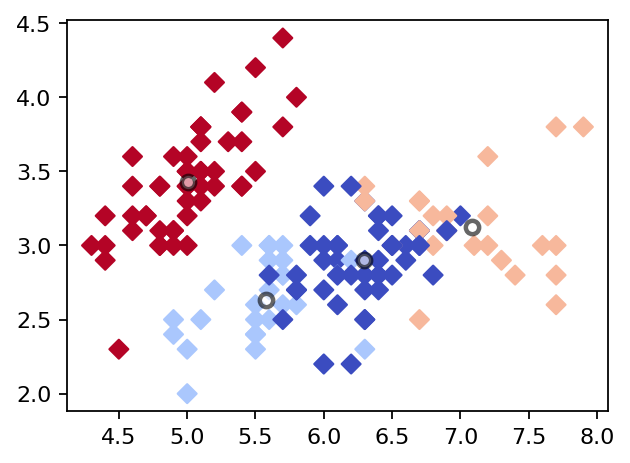

In [35]:
plt.figure(figsize = (4,3),dpi = 160)
plt.scatter(
    x[:,0],#所有数据点的第一个特征
    x[:,1],#第二个特征
    c =cluster_ids_x,#根据聚类标签着色
    cmap = 'coolwarm',
    marker = 'D'#菱形标记
)
plt.scatter(
    cluster_centers[:,0],cluster_centers[:,1],
    c='white',
    alpha = 0.6,
    edgecolors = 'black',
    linewidths = 2#边缘线宽
)
plt.tight_layout()
plt.show()